In [ ]:
import pandas as pd
import numpy as np

import warnings
import os
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_excel("/content/sample_data/NEWNEW.xlsx")

In [ ]:
df

,AGE_BUCKET,BANGALORE(Y/N),NRI / NON NRI,NO OF BOOKING,multiple complex,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,RELIGION SORTED,REGION_BUCKET,INCOME_BUCKET
0,NaN,N,NO,1,No,NaN,N,0,Hindu,CENTRAL,MEDIUM
1,NaN,Y,NO,1,No,NaN,N,0,Hindu,WESTERN,RICH
2,NaN,N,NO,1,No,NaN,N,0,Hindu,WESTERN,RICH
3,NaN,Y,NO,1,No,NaN,N,0,Hindu,EASTERN,MEDIUM
4,NaN,NaN,NaN,1,No,NaN,N,0,Hindu,EASTERN,RICH
...,...,...,...,...,...,...,...,...,...,...,...
1864,MIDAGE,N,YES,1,No,2 BHK,N,0,NaN,NaN,NaN
1865,MATURED,N,NO,2,No,"Plot,Plot",Y,2,NaN,NaN,NaN
1866,MIDAGE,Y,NO,1,No,2 BHK,N,0,NaN,NaN,LOW
1867,MIDAGE,N,YES,1,No,3 BHK,N,0,Hindu,EASTERN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AGE_BUCKET        1455 non-null   object
 1   BANGALORE(Y/N)    1483 non-null   object
 2   NRI / NON NRI     1460 non-null   object
 3   NO OF BOOKING     1869 non-null   int64 
 4   multiple complex  1869 non-null   object
 5   TYPE OF FLAT      1597 non-null   object
 6   PLOT(Y/N)         1869 non-null   object
 7   NO OF PLOTS       1869 non-null   int64 
 8   RELIGION SORTED   591 non-null    object
 9   REGION_BUCKET     441 non-null    object
 10  INCOME_BUCKET     430 non-null    object
dtypes: int64(2), object(9)
memory usage: 160.7+ KB


In [ ]:
df1 = pd.get_dummies(df['BANGALORE(Y/N)'], drop_first = True, prefix= "Bangalore_")

In [ ]:
df2 = pd.get_dummies(df['NRI / NON NRI'], drop_first= True, prefix= "NRI_")

In [ ]:
df3 = pd.get_dummies(df['multiple complex'], drop_first = True, prefix= "muliple_complex_")

In [ ]:
df4 = pd.get_dummies(df['PLOT(Y/N)'], drop_first= True, prefix= "Plot_")

In [ ]:
df5 = pd.get_dummies(df['RELIGION SORTED'], drop_first= True, prefix = "religion_sorted_")

In [ ]:
df6 = pd.get_dummies(df['REGION_BUCKET'], drop_first= True, prefix = "region_bucket_")

In [ ]:
df['INCOME_BUCKET'] = df['INCOME_BUCKET'].astype('category')
df['INCOME_BUCKET'] = df['INCOME_BUCKET'].cat.codes

In [ ]:
df['AGE_BUCKET'] = df['AGE_BUCKET'].astype('category')
df['AGE_BUCKET'] = df['AGE_BUCKET'].cat.codes

In [ ]:
df['TYPE OF FLAT'] = df['TYPE OF FLAT'].astype('category')
df['TYPE OF FLAT'] = df['TYPE OF FLAT'].cat.codes

In [ ]:
df7 = pd.concat([df1,df2,df3,df4,df5, df6], axis = 1)

In [ ]:
df_new = pd.concat([df, df7], axis = 1)

In [ ]:
df_new

,AGE_BUCKET,BANGALORE(Y/N),NRI / NON NRI,NO OF BOOKING,multiple complex,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,RELIGION SORTED,REGION_BUCKET,INCOME_BUCKET,Bangalore__Y,NRI__NO,NRI__YES,muliple_complex__YES,Plot__Y,religion_sorted__Hindu,religion_sorted__Muslim,religion_sorted__OtherList,religion_sorted__Sikh,region_bucket__EASTERN,region_bucket__NORTHEAST,region_bucket__NORTHERN,region_bucket__SOUTHERN,region_bucket__WESTERN
0,-1,N,NO,1,No,-1,N,0,Hindu,CENTRAL,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-1,Y,NO,1,No,-1,N,0,Hindu,WESTERN,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,-1,N,NO,1,No,-1,N,0,Hindu,WESTERN,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,-1,Y,NO,1,No,-1,N,0,Hindu,EASTERN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,-1,NaN,NaN,1,No,-1,N,0,Hindu,EASTERN,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1,N,YES,1,No,3,N,0,NaN,NaN,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1865,0,N,NO,2,No,35,Y,2,NaN,NaN,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1866,1,Y,NO,1,No,3,N,0,NaN,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1867,1,N,YES,1,No,15,N,0,Hindu,EASTERN,-1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
df_new = df_new.drop(['BANGALORE(Y/N)'], axis = 1)
df_new = df_new.drop(['NRI / NON NRI'], axis = 1)
df_new = df_new.drop(['multiple complex'], axis = 1)
df_new = df_new.drop(['PLOT(Y/N)'], axis = 1)
df_new = df_new.drop(['REGION_BUCKET'], axis = 1)
df_new = df_new.drop(['RELIGION SORTED'], axis = 1)
df_new = df_new.drop(['TYPE OF FLAT'], axis = 1)

df_new

,AGE_BUCKET,NO OF BOOKING,NO OF PLOTS,INCOME_BUCKET,Bangalore__Y,NRI__NO,NRI__YES,muliple_complex__YES,Plot__Y,religion_sorted__Hindu,religion_sorted__Muslim,religion_sorted__OtherList,religion_sorted__Sikh,region_bucket__EASTERN,region_bucket__NORTHEAST,region_bucket__NORTHERN,region_bucket__SOUTHERN,region_bucket__WESTERN
0,-1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-1,1,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,-1,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,-1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,-1,1,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1,1,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1865,0,2,2,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1866,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1867,1,1,0,-1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)
df_imputer = imputer.fit_transform(df_new)
df_imputer

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [-1.,  1.,  0., ...,  0.,  0.,  1.],
       [-1.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.]])

In [ ]:
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df_imputer)), columns= df_new.columns)
encode_data

,AGE_BUCKET,NO OF BOOKING,NO OF PLOTS,INCOME_BUCKET,Bangalore__Y,NRI__NO,NRI__YES,muliple_complex__YES,Plot__Y,religion_sorted__Hindu,religion_sorted__Muslim,religion_sorted__OtherList,religion_sorted__Sikh,region_bucket__EASTERN,region_bucket__NORTHEAST,region_bucket__NORTHERN,region_bucket__SOUTHERN,region_bucket__WESTERN
0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1865,0.0,2.0,2.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1866,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1867,1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt 
#import seaborn as sns 
#from sklearn.decomposition import PCA
#from sklearn.metrics import silhouette_score
#from fancyimpute import KNN
#pip install kmodes
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4469.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 192, cost: 3470.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 195, cost: 3133.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 203, cost: 3096.0


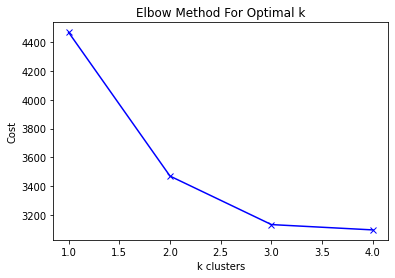

In [ ]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(encode_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
km = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
cluster_labels = km.fit_predict(encode_data)
encode_data['Cluster'] = cluster_labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 192, cost: 3470.0


In [ ]:
encode_data

,AGE_BUCKET,NO OF BOOKING,NO OF PLOTS,INCOME_BUCKET,Bangalore__Y,NRI__NO,NRI__YES,muliple_complex__YES,Plot__Y,religion_sorted__Hindu,religion_sorted__Muslim,religion_sorted__OtherList,religion_sorted__Sikh,region_bucket__EASTERN,region_bucket__NORTHEAST,region_bucket__NORTHERN,region_bucket__SOUTHERN,region_bucket__WESTERN,Cluster
0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,-1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,-1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1865,0.0,2.0,2.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1866,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1867,1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(encode_data), columns = encode_data.columns)
df_scaled['Cluster'] = km.labels_
df_mean = (df_scaled.groupby('Cluster').mean())

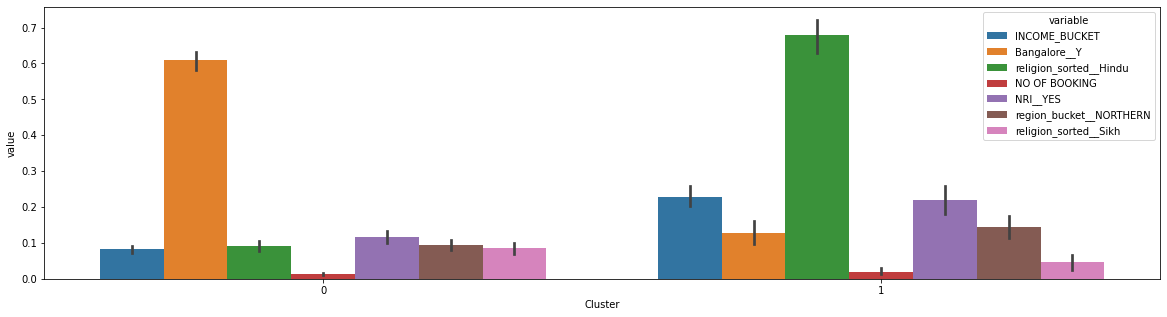

In [ ]:
plt.figure(figsize=(20,5))

results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(encode_data[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['Cluster']
tidy = df_scaled[selected_columns].melt(id_vars='Cluster')
sns.barplot(x='Cluster', y='value', hue='variable', data=tidy)

In [ ]:
encode_data.to_csv("try.csv")

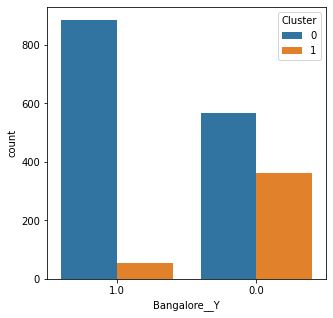

In [ ]:
plt.subplots(figsize = (5,5))
sns.countplot(x=encode_data['Bangalore__Y'],order=encode_data['Bangalore__Y'].value_counts().index,hue=encode_data['Cluster'])
plt.show()

# New Section

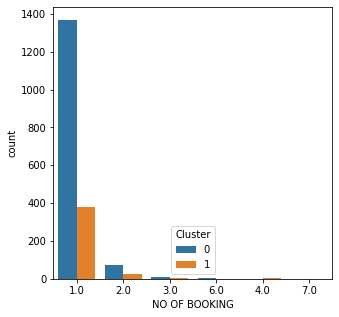

In [ ]:
plt.subplots(figsize = (5,5))
sns.countplot(x=encode_data['NO OF BOOKING'],order=encode_data['NO OF BOOKING'].value_counts().index,hue=encode_data['Cluster'])
plt.show()